# Линейная регрессия

На примере прогнозирования роста человека по его весу

**Материалы**

- [Документация](http://docs.scipy.org/doc/) по библиотекам NumPy и SciPy
- [Документация](http://matplotlib.org/) по библиотеке Matplotlib 
- [Документация](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) по библиотеке Pandas
- [Pandas Cheat Sheet](http://www.analyticsvidhya.com/blog/2015/07/11-steps-perform-data-analysis-pandas-python/)
- [Документация](http://stanford.edu/~mwaskom/software/seaborn/) по библиотеке Seaborn 

## Первичный анализ данных c Pandas

будем использовать данные [SOCR](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights) по росту и весу 25 тысяч подростков.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Считаем данные по росту и весу в объект Pandas DataFrame:

In [3]:
data = pd.read_csv('weights_heights.csv', index_col='Index')

Построим гистограмму распределения роста подростков из выборки *data*. Используем метод *plot* для DataFrame *data* c аргументами *y='Height'*

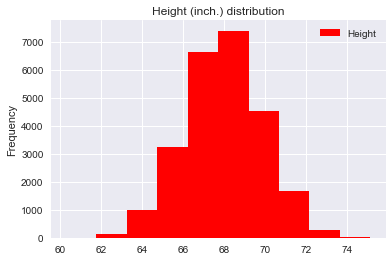

In [4]:
data.plot(y='Height', kind='hist', 
           color='red',  title='Height (inch.) distribution')

Аргументы:

- *y='Height'* - тот признак, распределение которого мы строим
- *kind='hist'* - означает, что строится гистограмма
- *color='red'* - цвет

первые 5 записей

In [5]:
data.head()

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


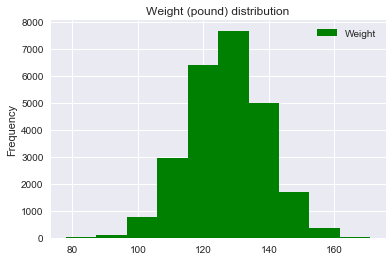

In [6]:
data.plot(y='Weight', kind='hist', 
           color='green',  title='Weight (pound) distribution')

отображение попарных зависимостей признаков

добавим третий признак

In [7]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [8]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)
data.head()

,Height,Weight,BMI
Index,,,
1,65.78331,112.9925,18.357573
2,71.51521,136.4873,18.762577
3,69.39874,153.0269,22.338895
4,68.21660,142.3354,21.504526
5,67.78781,144.2971,22.077581


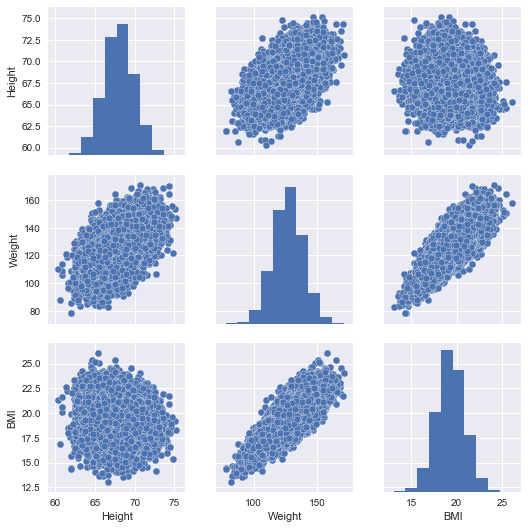

In [9]:
sns.pairplot(data)
plt.show()

строим "ящики с усами" - boxplots библиотеки Seaborn. Box plot - это компактный способ показать статистики вещественного признака (среднее и квартили) по разным значениям категориального признака. Также помогает отслеживать "выбросы" - наблюдения, в которых значение данного вещественного признака сильно отличается от других. 

**[4]**. создаем в DataFrame *data* новый признак *weight_category*, который будет иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес  больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях. Строим «ящик с усами» (boxplot)

In [10]:
def weight_category(weight):
    pass
    # -----------------
    if weight < 120:
        return 1
    elif weight >= 150:
        return 3
    else:
        return 2

data['weight_cat'] = data['Weight'].apply(weight_category)
# --------------
data.head()

,Height,Weight,BMI,weight_cat
Index,,,,
1,65.78331,112.9925,18.357573,1
2,71.51521,136.4873,18.762577,2
3,69.39874,153.0269,22.338895,3
4,68.21660,142.3354,21.504526,2
5,67.78781,144.2971,22.077581,2


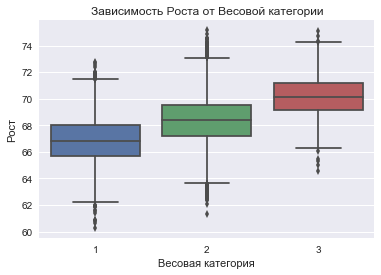

In [11]:
box=sns.boxplot(x=data['weight_cat'], y=data['Height'])
box.set(xlabel=u'Весовая категория',
        ylabel=u'Рост', 
        title=u'Зависимость Роста от Весовой категории')  # добавим подписи к осям и заголовок
plt.show()

Строим в scatter plot зависимость роста от веса, используя метод *plot* для Pandas DataFrame с аргументом *kind='scatter'*

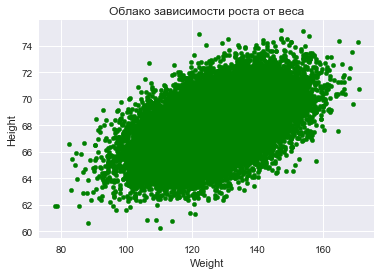

In [12]:
data.plot(y='Height', x='Weight', kind='scatter', 
          color='green',  
          title=u'Облако зависимости роста от веса')
plt.show()

## Минимизация квадратичной ошибки

Пишем функцию, которая по двум параметрам $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости роста $y$ от веса $x$ прямой линией $y = w_0 + w_1 * x$:

In [13]:
# формируем функцию ошибки, делаем это через 1 аргумент (так будет нужно в дальнейшем для оптимизации)
def error(w):
    return sum((data.Height - (w[0] + w[1] * data.Weight)) ** 2)

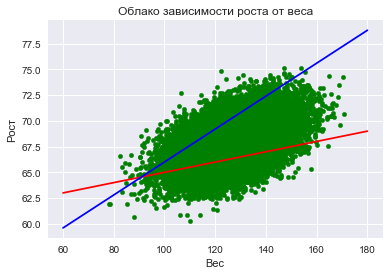

In [14]:
graph = data.plot(y='Height', x='Weight', kind='scatter', 
           color='green')
graph.set(xlabel=u'Вес', ylabel=u'Рост', title=u'Облако зависимости роста от веса')
x = np.linspace(60, 180, 2)
for w in ([60, 0.05, 'r'], [50, 0.16, 'b']):
    plt.plot(x, w[0] + w[1] * x, color=w[2])
plt.show()

Посмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.

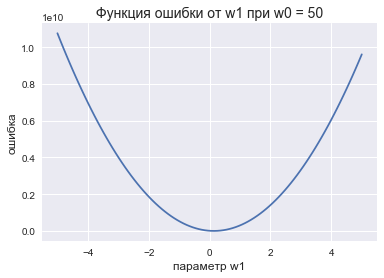

In [15]:
w0 = 50
k = 100 # размер сетки
x = np.linspace(-5, 5, k)
y = np.empty(k) # создаем пустой массив будущей функции ошибки
for i in range(len(x)):
    y[i] = error([w0, x[i]]) # функцию приходится формировать по точкам, т.к. внутри функции есть умножение аргумента на вектор 

plt.plot(x, y)

# подписываем оси и график
plt.title(u'Функция ошибки от w1 при w0 = 50', fontsize=14)
plt.xlabel(u'параметр w1', fontsize=12)
plt.ylabel(u'ошибка', fontsize=12)

plt.show()

Теперь методом оптимизации найдем "оптимальный" наклон прямой, приближающей зависимость роста от веса, при фиксированном коэффициенте $w_0 = 50$.

In [16]:
import scipy

error_w0_50 = lambda x: error([50, x]) # формируем функцию от одного параметра

w1_opt = scipy.optimize.minimize_scalar(error_w0_50, [-5, 5])

print 'w1_opt =', w1_opt.x

w1_opt = 0.141092037288


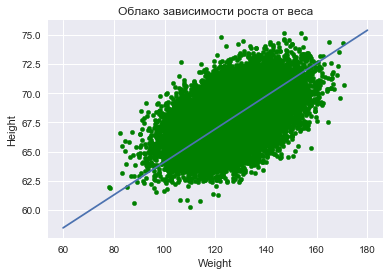

In [17]:
# проведение на графике из п. 5 Задания 1 прямой, соответствующей значениям параметров (w0, w1) = (50, w1_opt)
data.plot(y='Height', x='Weight', kind='scatter', 
           color='green',  title=u'Облако зависимости роста от веса')
x = np.linspace(60, 180, 2)
w1 = w1_opt.x
plt.plot(x, w0 + w1 * x)
plt.show()

3D визуализация, пример

In [18]:
from mpl_toolkits.mplot3d import Axes3D

Создаем объекты типа matplotlib.figure.Figure (рисунок) и  matplotlib.axes._subplots.Axes3DSubplot (ось). 

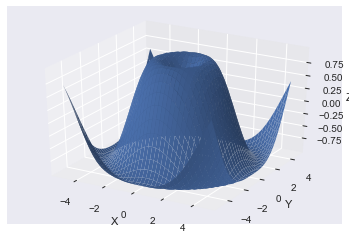

In [19]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

3D визуализация



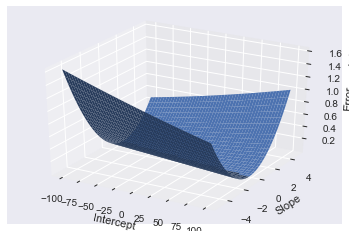

In [20]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию err(w0, w1).
w0 = np.arange(-100, 100, 1)
w1 = np.arange(-5, 5, 0.25)

#print w0, w1, err[1][2]
#print err.ndim

w0, w1 = np.meshgrid(w0, w1)

# строим массив функции ошибки. Делаем по точкам, т.к. внутри функции есть умножение аргумента на вектор
err = np.zeros((len(w0), len(w0[0])))
for i in xrange(len(w0)):
    for j in xrange(len(w0[0])):
        err[i][j] = error([w0[i][j], w1[i][j]])


# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(w0, w1, err)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

Ищем минимум функции, определенной выше, для значений параметра $w_0$ в диапазоне [-100,100] и $w_1$ - в диапазоне [-5, 5]. Начальная точка – ($w_0$, $w_1$) = (0, 0)

In [21]:
from scipy import optimize
x0 = [0, 0]
w_opt = optimize.minimize(error, x0, method='L-BFGS-B', bounds=[(-100, 100), (-5, 5)])
print w_opt.x

[ 57.57171521   0.08200697]


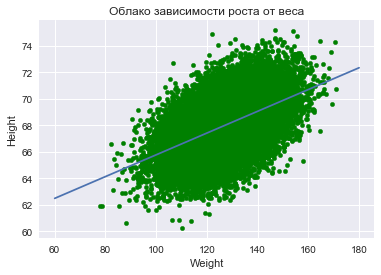

In [22]:
data.plot(y='Height', x='Weight', kind='scatter', 
           color='green',  title=u'Облако зависимости роста от веса')
x = np.linspace(60, 180, 2)
w = w_opt.x
plt.plot(x, w[0] + w[1] * x)
plt.show()